In [9]:
import pandas as pd
import statistics as sts
import seaborn as srn

In [10]:
data = pd.read_csv('tempo.csv',sep = ";")

In [11]:
data.shape

(14, 5)

In [12]:
data.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [13]:
data.columns = ["Aparencia", "Temperatura","Umidade", "Vento", "Jogar"]

In [14]:
data.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [15]:
# explorar dados categóricos 
#estado
agrupado = data.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

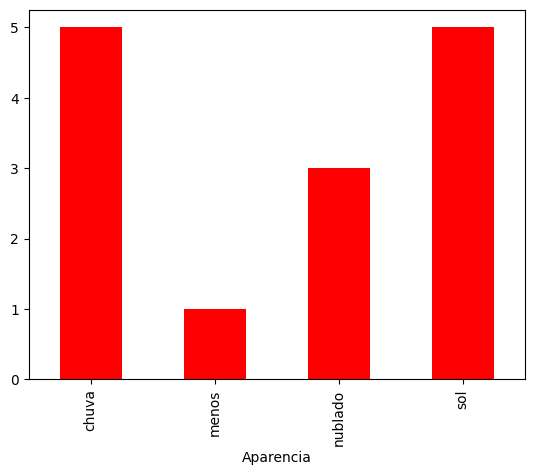

In [16]:
agrupado.plot.bar(color='red')

In [17]:
agrupado = data.groupby(['Temperatura']).size()
agrupado


Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

<Axes: xlabel='Temperatura'>

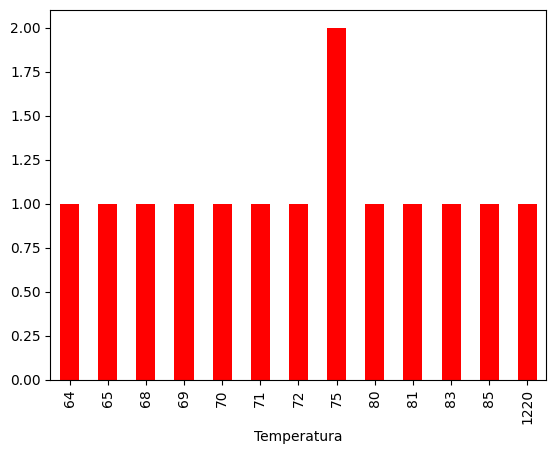

In [18]:
agrupado.plot.bar(color='red')

In [19]:
agrupado = data.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

<Axes: xlabel='Umidade'>

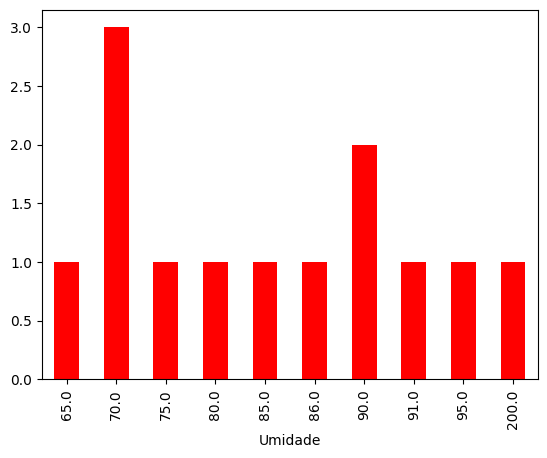

In [20]:
agrupado.plot.bar(color='red')

In [21]:
agrupado = data.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [22]:
agrupado = data.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

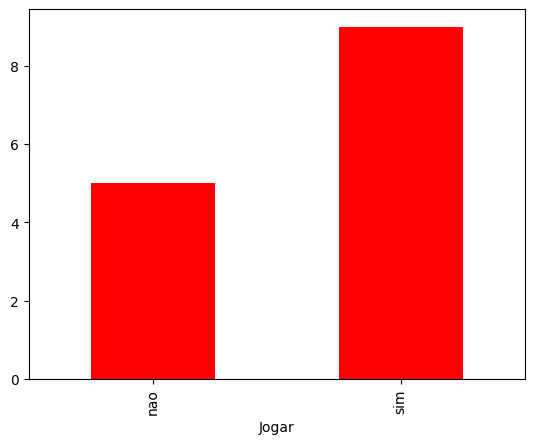

In [23]:
agrupado.plot.bar(color= 'red')

In [24]:
#explorando os dados
data['Aparencia'].describe()

count      14
unique      4
top       sol
freq        5
Name: Aparencia, dtype: object

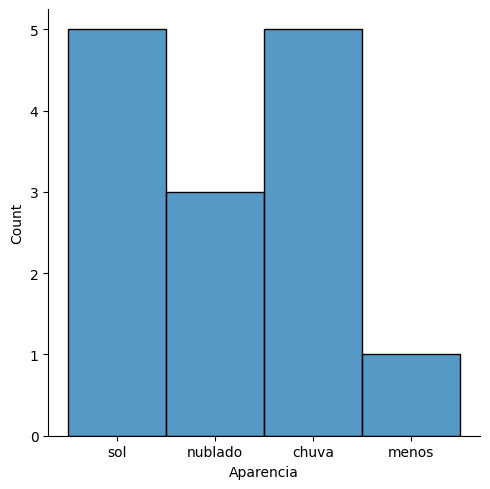

In [25]:
srn.displot(data['Aparencia'])


In [26]:
data['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

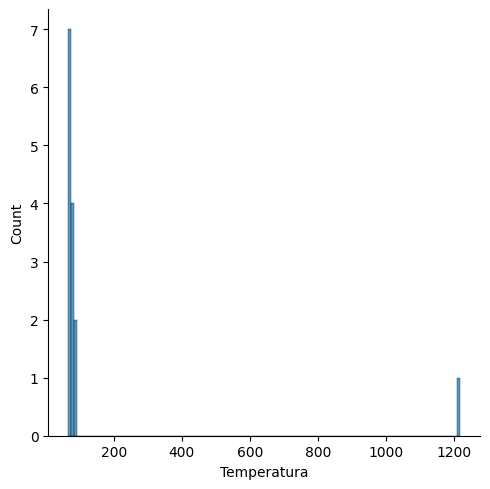

In [27]:
srn.displot(data['Temperatura'])


In [28]:
data['Umidade'].describe()


count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

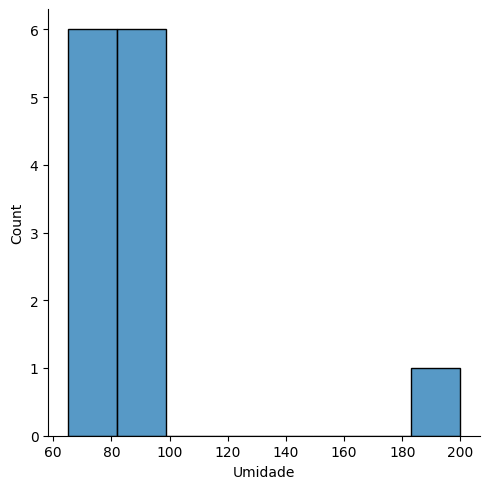

In [29]:
srn.displot(data['Umidade'])

In [30]:
#procurando valores null
data.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [31]:
#tratando dados
data['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [32]:
mediana = sts.median(data['Umidade'])
mediana

85.5

In [33]:
data.fillna({'Umidade':mediana},inplace=True)
data['Umidade'].isnull().sum()

np.int64(0)

In [34]:
data['Vento'].describe()

count        13
unique        2
top       FALSO
freq          7
Name: Vento, dtype: object

In [35]:
data.fillna({'Vento': 'FALSO'}, inplace=True)
data['Vento'].isnull().sum()

np.int64(0)

In [36]:
data.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [37]:
#Dados fora do dominio
data['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [38]:
data.loc[(data['Temperatura'] < -130) | (data['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [39]:
mediana = sts.median(data['Temperatura'])
mediana = int(mediana)

In [40]:
data.loc[(data['Temperatura'] < -130) | (data['Temperatura'] > 130)] = mediana

In [41]:
data['Temperatura'].describe()

count    14.000000
mean     73.642857
std       6.558695
min      64.000000
25%      69.250000
50%      72.500000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [42]:
data.loc[(data['Temperatura'] < -130) | (data['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [43]:
agrupado = data.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
73.0     1
75.0     1
80.0     1
85.0     1
85.5     1
86.0     1
90.0     2
91.0     1
200.0    1
dtype: int64

In [44]:
mediana = sts.median(data['Umidade'])
mediana = int(mediana)
mediana

82

In [45]:
data.loc[(data['Umidade'] < 0) | (data['Umidade'] > 100)] = mediana

In [46]:
data.loc[(data['Umidade'] < 0) | (data['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [47]:
data.head(14)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,73,73,73.0,73,73
8,sol,69,70.0,FALSO,sim
9,82,82,82.0,82,82


In [48]:
#tratando aparencia 
data['Aparencia'].describe()

count      14
unique      6
top       sol
freq        4
Name: Aparencia, dtype: object

In [49]:
data.loc[data['Aparencia'].isin(['menos', 73.5, 82]), 'Aparencia'] = "sol"


In [50]:
data['Vento'].describe()

count        14
unique        4
top       FALSO
freq          6
Name: Vento, dtype: object

In [51]:
data.loc[data['Vento'].isin([ 73.5, 82]), 'Vento'] = "FALSO"


In [52]:
data['Vento'].describe()

count        14
unique        3
top       FALSO
freq          7
Name: Vento, dtype: object

In [53]:
data['Jogar'].describe()

count      14
unique      4
top       sim
freq        8
Name: Jogar, dtype: object

In [54]:
data.loc[data['Jogar'].isin([ 73.5, 82]), 'Jogar'] = "sim"


In [55]:
data.describe()

,Temperatura,Umidade
count,14.000000,14.000000
mean,74.142857,79.464286
std,6.926617,8.819699
min,64.000000,65.000000
25%,69.250000,70.750000
50%,72.500000,81.000000
75%,80.750000,85.875000
max,85.000000,91.000000


In [56]:
data.head(14)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,sol,64,65.0,VERDADEIRO,sim
7,73,73,73.0,73,73
8,sol,69,70.0,FALSO,sim
9,sol,82,82.0,FALSO,sim


In [57]:
data.loc[data['Aparencia'].isin(['FALSO']), 'Aparencia'] = "sol"
